In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:

from google.colab import drive
import shutil
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import librosa
import pickle

In [3]:
drive.mount('/content/gdrive')

current_path = os.path.join(os.getcwd(), 'gdrive/MyDrive')

Mounted at /content/gdrive


In [ ]:
shutil.unpack_archive(os.path.join(current_path, "speech_commands_v0.02.tar.gz"), os.path.join(current_path + "speech_commands_v0_02_dataset"))

In [4]:
dataset_path = os.path.join(current_path,"speech_commands_v0_02_dataset")

# Análisis del dataset

In [5]:
commands = os.listdir(dataset_path)
print(commands)

['LICENSE', 'four', '.DS_Store', 'validation_list.txt', 'testing_list.txt', 'forward', 'on', 'visual', 'up', 'zero', 'stop', 'follow', 'happy', 'learn', 'cat', 'README.md', 'eight', 'sheila', '_background_noise_', 'nine', 'yes', 'one', 'no', 'left', 'tree', 'bed', 'bird', 'go', 'wow', 'seven', 'marvin', 'dog', 'three', 'two', 'house', 'backward', 'down', 'six', 'five', 'off', 'right']


In [6]:
# Eliminar los nombres de los archivos que no se corresponden con los comandos ni las palabras pertenecientes a "Unkown word"
for file_name in ['README.md', '_background_noise_', 'validation_list.txt', 'LICENSE', '.DS_Store', 'testing_list.txt']:
  commands.remove(file_name)

print('El número de comandos es :', len(commands))

El número de comandos es : 35


In [7]:
print('Los comandos, sin crear la clase "Unkown word" son: ', commands)

Los comandos, sin crear la clase "Unkown word" son:  ['four', 'forward', 'on', 'visual', 'up', 'zero', 'stop', 'follow', 'happy', 'learn', 'cat', 'eight', 'sheila', 'nine', 'yes', 'one', 'no', 'left', 'tree', 'bed', 'bird', 'go', 'wow', 'seven', 'marvin', 'dog', 'three', 'two', 'house', 'backward', 'down', 'six', 'five', 'off', 'right']


In [8]:
np.unique(commands)

array(['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five',
       'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn',
       'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right',
       'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up',
       'visual', 'wow', 'yes', 'zero'], dtype='<U8')

In [9]:
commands_and_freq = {command: len(os.listdir(os.path.join(dataset_path, command))) for command in commands}

In [10]:
commands_and_freq

{'four': 3728,
 'forward': 1557,
 'on': 3845,
 'visual': 1592,
 'up': 3723,
 'zero': 4052,
 'stop': 3872,
 'follow': 1579,
 'happy': 2054,
 'learn': 1575,
 'cat': 2031,
 'eight': 3787,
 'sheila': 2022,
 'nine': 3934,
 'yes': 4044,
 'one': 3890,
 'no': 3941,
 'left': 3801,
 'tree': 1759,
 'bed': 2014,
 'bird': 2064,
 'go': 3880,
 'wow': 2123,
 'seven': 3998,
 'marvin': 2100,
 'dog': 2128,
 'three': 3727,
 'two': 3880,
 'house': 2113,
 'backward': 1664,
 'down': 3917,
 'six': 3860,
 'five': 4052,
 'off': 3745,
 'right': 3778}

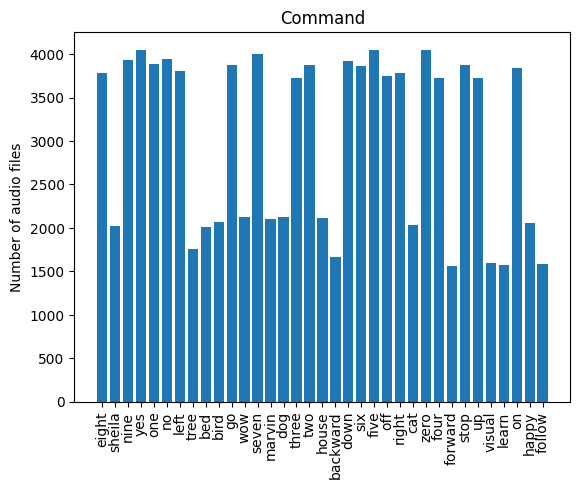

In [ ]:
# Crear representación visual del los comandos y la cantidad de instancias que se tienen
fig, ax = plt.subplots()
ax.bar(commands_and_freq.keys(), commands_and_freq.values(), label=commands_and_freq.keys())
ax.set_ylabel('Number of audio files')
ax.set_title('Command')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Crear gráfica ahora agrupando los comandos que pretenecen a la clase "Unkown word"
commands_unkown_word = ["bed", "bird", "cat", "dog", "happy", "house", "marvin", "sheila", "tree", "wow"]
unkown_word_freq = sum([commands_and_freq[command] for command in commands_unkown_word])

new_commands_and_freq = {"unknown_word": unkown_word_freq}
for command in commands:
  if command not in commands_unkown_word:
    new_commands_and_freq[command] = commands_and_freq[command]

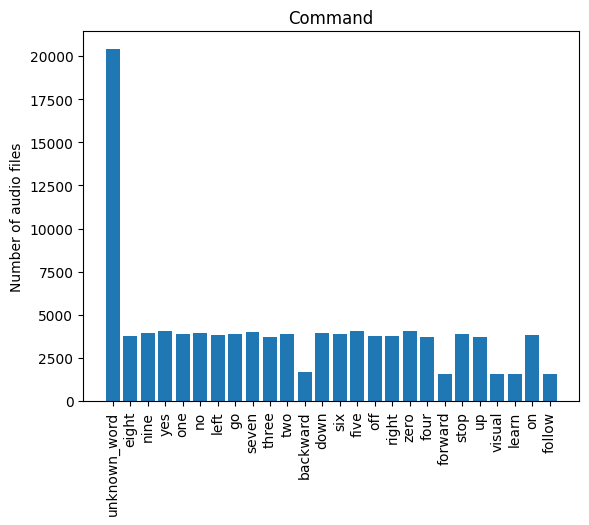

In [ ]:
fig, ax = plt.subplots()
ax.bar(new_commands_and_freq.keys(), new_commands_and_freq.values(), label=new_commands_and_freq.keys())
ax.set_ylabel('Number of audio files')
ax.set_title('Command')
plt.xticks(rotation=90)
plt.show()

In [12]:
ind_min_freq = np.argmin(list(new_commands_and_freq.values()))
print("El comando con menos frecuencias es", list(new_commands_and_freq.keys())[ind_min_freq], 'con un total de', list(new_commands_and_freq.values())[ind_min_freq], 'instancias')

El comando con menos frecuencias es forward con un total de 1557 instancias


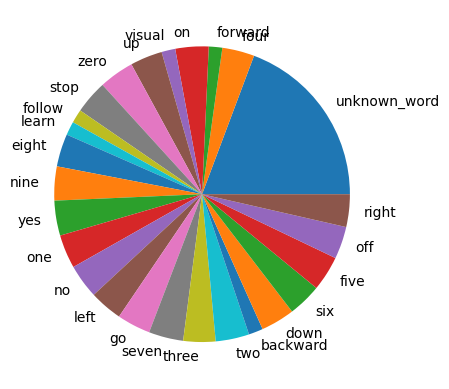

In [13]:
fig, ax = plt.subplots()
ax.pie(new_commands_and_freq.values(), labels=new_commands_and_freq.keys())
plt.show()

# Reducción de la base de datos para balancearla (undersampling)

In [ ]:
new_commands_and_freq


{'unknown_word': 20408,
 'eight': 3787,
 'nine': 3934,
 'yes': 4044,
 'one': 3890,
 'no': 3941,
 'left': 3801,
 'go': 3880,
 'seven': 3998,
 'three': 3727,
 'two': 3880,
 'backward': 1664,
 'down': 3917,
 'six': 3860,
 'five': 4052,
 'off': 3745,
 'right': 3778,
 'zero': 4052,
 'four': 3728,
 'forward': 1557,
 'stop': 3872,
 'up': 3723,
 'visual': 1592,
 'learn': 1575,
 'on': 3845,
 'follow': 1579}

In [ ]:
# Función para cargar los audios
def load_dataset(path, commands, sr):
    data=[]
    label=[]
    sample=[]
    for command in commands:
        path_=os.path.join(path, command)
        for file_name in os.listdir(path_):
            data_contain,sample_rate=librosa.load(os.path.join(path_,file_name) ,sr=sr)
            data.append(data_contain)
            sample.append(sample_rate)
            label.append(command)
    return data, label, sample

In [ ]:
data, label, sample = load_dataset(dataset_path, commands, 16000)

# Creación del dataset B con downsampling

In [ ]:
os.listdir(dataset_path)

['eight',
 'README.md',
 'sheila',
 '_background_noise_',
 'nine',
 'yes',
 'one',
 'no',
 'left',
 'tree',
 'bed',
 'bird',
 'go',
 'wow',
 'seven',
 'marvin',
 'dog',
 'three',
 'validation_list.txt',
 'two',
 'house',
 'LICENSE',
 'backward',
 'down',
 'six',
 'five',
 'off',
 'right',
 'cat',
 'zero',
 'four',
 '.DS_Store',
 'forward',
 'stop',
 'up',
 'visual',
 'learn',
 'testing_list.txt',
 'on',
 'happy',
 'follow']

In [ ]:
# Función para cargar los audios
def create_data_sets_downsampling(path, commands, sr, validation_ids, test_ids,
                                  max_n_train):
  val_data=[]
  val_label=[]

  test_data=[]
  test_label=[]

  train_data=[]
  train_label=[]

  for command in commands:
    n_train = 0
    path_=os.path.join(path, command)

    for file_name in os.listdir(path_):
      complete_file_name = os.path.join(command, file_name)
      if complete_file_name in validation_ids:
        data_contain,sample_rate=librosa.load(os.path.join(path_,file_name) ,sr=sr)
        val_data.append(data_contain)
        val_label.append(command)

      elif complete_file_name in test_ids:
        data_contain,sample_rate=librosa.load(os.path.join(path_,file_name) ,sr=sr)
        test_data.append(data_contain)
        test_label.append(command)

      # Max num of training examples is restricted
      elif n_train < max_n_train:
        data_contain,sample_rate=librosa.load(os.path.join(path_,file_name) ,sr=sr)
        train_data.append(data_contain)
        train_label.append(command)
        n_train += 1

  return val_data, val_label, test_data, test_label, train_data, train_label

In [ ]:
with open(os.path.join(dataset_path, "validation_list.txt"), "r") as val_file:
  validation_ids = set(val_file.read().splitlines())

with open(os.path.join(dataset_path,"testing_list.txt"), "r") as test_file:
  test_ids = set(test_file.read().splitlines())

In [ ]:
max_n_train = min(new_commands_and_freq.values())
print(max_n_train)

1557


In [ ]:
# Creación de los conjuntos de train, validation y test en base a los
# especificados en el paper, pero realizando un downsampling
sampling_rate = 16000

val_data, val_label, test_data, test_label, train_data, train_label = create_data_sets_downsampling(
    dataset_path, commands, sampling_rate, validation_ids, test_ids, max_n_train)

In [ ]:
path_=os.path.join(dataset_path, commands[0])
print(path_)
list_dir = os.listdir(path_)
print(os.path.join(command, list_dir[0]))

/content/gdrive/MyDrive/speech_commands_v0_02_dataset/four
right/9ba34294_nohash_0.wav


In [ ]:
def save_with_pickle(name_file, data, path_to_safe):
  with open(os.path.join(path_to_safe, name_file), "wb") as f:
      pickle.dump(data, f)

In [ ]:
def load_object(path_to_file):
  with open(path_to_file, "rb") as input_file:
    object = pickle.load(input_file)
  return object

In [ ]:
path_save_downsampled = os.path.join(current_path, "speech_commands_data/downsampled_dataset")

# Save train data
save_with_pickle('x_training_downsampled.pickle', train_data, path_save_downsampled)
save_with_pickle('label_training_downsampled.pickle', train_label, path_save_downsampled)

In [ ]:
path_save_downsampled = os.path.join(current_path, "speech_commands_data/downsampled_dataset")
# Save validation data
save_with_pickle('x_val_downsampled.pickle', val_data, path_save_downsampled)
save_with_pickle('label_val_downsampled.pickle', val_label, path_save_downsampled)

In [ ]:
# Save test data
save_with_pickle('x_test_downsampled.pickle', test_data, path_save_downsampled)
save_with_pickle('label_test_downsampled.pickle', test_label, path_save_downsampled)

In [ ]:
path_save_downsampled = os.path.join(current_path, "speech_commands_data/downsampled_dataset")
x_train = load_object(os.path.join(path_save_downsampled, 'x_training_downsampled.pickle'))
label_train = load_object(os.path.join(path_save_downsampled, 'label_training_downsampled.pickle'))

La palabra con la frecuencia mínima es forward y tienen un total de 1256 intancias.


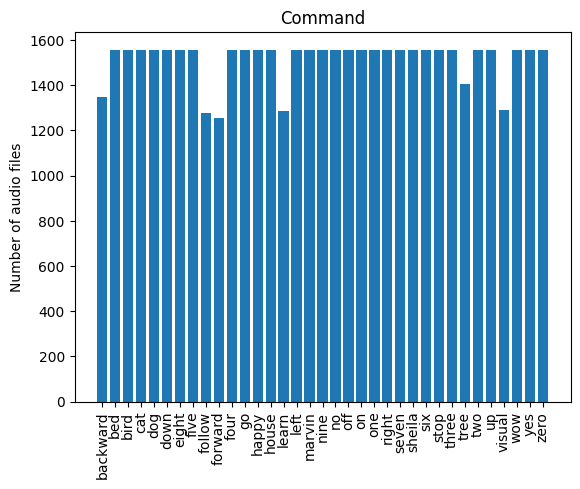

In [ ]:
labels_train, freqs_train = np.unique(label_train, return_counts=True)
ind_min_freq_train = np.argmin(freqs_train)
print('La palabra con la frecuencia mínima es', labels_train[ind_min_freq_train], 'y tienen un total de', freqs_train[ind_min_freq_train], 'intancias.')

fig, ax = plt.subplots()
ax.bar(labels_train, freqs_train, label=labels_train)
ax.set_ylabel('Number of audio files')
ax.set_title('Command')
plt.xticks(rotation=90)
plt.show()

Al analizarse los resultados anteriores, se observa que no se ha creado bien el conjunto de train, por error humano. Esto es porque se había decidido tomar como valor de downsampling, la frequencia del comando que menos veces aparecía en el dataset completo. Esto es erróneo, ya que parte de esas muestras pertenecerán al conjunto de entrenamiento, y otras al de validación. Por lo tanto, ahora se observa que el comando que menos veces aparece en el conjunto de train es "forward" con una frequencia de 1256.

In [ ]:
# Rehacer el conjunto de train
def reduce_number_of_instances(data, label, new_size):
  new_data = []
  new_label = []

  label_array = np.array(label)

  # No es posible crear un array de train_data ya que los datos de todos los audios
  # no tienen el mismo tamaño

  for command in commands:
    inds = np.where(label_array == command)[0]
    for ind in inds[:new_size]:
      new_data.append(data[ind])
      new_label.append(label[ind])

  return new_data, new_label

In [ ]:
new_size = int(freqs_train[ind_min_freq_train])
new_x_train, new_label_train = reduce_number_of_instances(x_train, label_train, new_size)

In [ ]:
path_save_downsampled = os.path.join(current_path, "speech_commands_data/downsampled_dataset")

# Save train data
save_with_pickle('x_train_downsampled.pickle', new_x_train, path_save_downsampled)
save_with_pickle('label_train_downsampled.pickle', new_label_train, path_save_downsampled)

In [ ]:
len(new_x_train), len(x_train)

(43960, 53011)

Dado que la clase "Unkown word" está formada por 10 comandos, se va a reducir el número de instancias en ellos para que el total sea 1256 o 1260, para redondear (126 instancias por cada comando).

In [ ]:
def resize_labels_belonging_to_unkown_class_downsampled_dataset(data, label, new_size, commands_unkown_class):
  new_data = []
  new_label = []

  label_array = np.array(label)

  # No es posible crear un array de train_data ya que los datos de todos los audios
  # no tienen el mismo tamaño

  for command in commands:
    inds = np.where(label_array == command)[0]
    if command in commands_unkown_class:
      new_size_command = new_size
      for ind in inds[:new_size_command]:
        new_data.append(data[ind])
        new_label.append(label[ind])
    else:
      for ind in inds:
        new_data.append(data[ind])
        new_label.append(label[ind])

  return new_data, new_label

In [ ]:
class_size = len(np.where(np.array(new_label_train) == 'bed')[0])

# Ese es el tamaño total que debe tener "Unkown word"
print('Número de comandos que pertenecen a la clase "Unkown word: ', len(commands_unkown_word))

new_size = round(class_size / len(commands_unkown_word))
print(new_size)

Número de comandos que pertenecen a la clase "Unkown word:  10
126


In [ ]:
train_data_downsampled_cleaned, train_label_downsampled_cleaned = resize_labels_belonging_to_unkown_class_downsampled_dataset(
    new_x_train, new_label_train, new_size, commands_unkown_word)

In [ ]:
np.unique(train_label_downsampled_cleaned, return_counts=True)

(array(['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five',
        'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn',
        'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right',
        'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up',
        'visual', 'wow', 'yes', 'zero'], dtype='<U8'),
 array([1256,  126,  126,  126,  126, 1256, 1256, 1256, 1256, 1256, 1256,
        1256,  126,  126, 1256, 1256,  126, 1256, 1256, 1256, 1256, 1256,
        1256, 1256,  126, 1256, 1256, 1256,  126, 1256, 1256, 1256,  126,
        1256, 1256]))

In [ ]:
print('Data size of the correctly downsampled dataset is', len(train_label_downsampled_cleaned))

Data size of the correctly downsampled dataset is 32660


In [ ]:
save_with_pickle('cleaned_x_train_downsampled.pickle', train_data_downsampled_cleaned, path_save_downsampled)
save_with_pickle('cleaned_label_train_downsampled.pickle', train_label_downsampled_cleaned, path_save_downsampled)

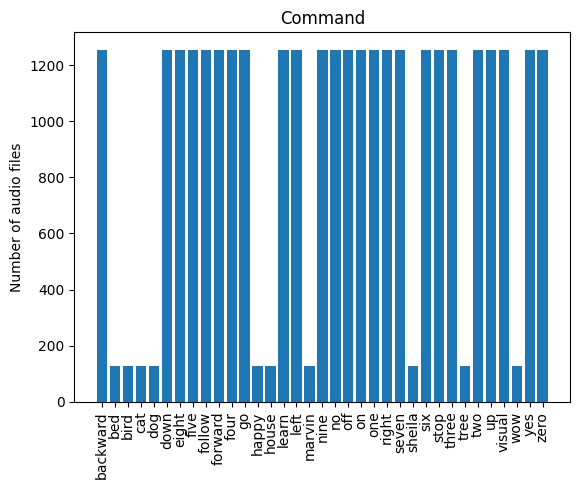

In [ ]:
labels_train_downs, freqs_train_downs = np.unique(train_label_downsampled_cleaned, return_counts=True)
fig, ax = plt.subplots()
ax.bar(labels_train_downs, freqs_train_downs, label=labels_train_downs)
ax.set_ylabel('Number of audio files')
ax.set_title('Command')
plt.xticks(rotation=90)
plt.show()

Conjunto de validación

In [ ]:
path_save_downsampled = os.path.join(current_path, "speech_commands_data/downsampled_dataset")
x_val = load_object(os.path.join(path_save_downsampled, 'x_val_downsampled.pickle'))
label_val = load_object(os.path.join(path_save_downsampled, 'label_val_downsampled.pickle'))

La palabra con la frecuencia mínima es learn y tienen un total de 128 intancias.


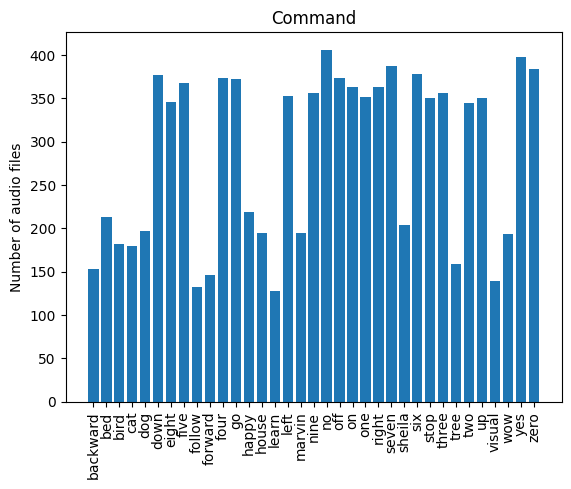

In [ ]:
labels_val, freqs_val = np.unique(label_val, return_counts=True)
ind_min_freq_val = np.argmin(freqs_val)
print('La palabra con la frecuencia mínima es', labels_val[ind_min_freq_val], 'y tienen un total de', freqs_val[ind_min_freq_val], 'intancias.')

fig, ax = plt.subplots()
ax.bar(labels_val, freqs_val, label=labels_val)
ax.set_ylabel('Number of audio files')
ax.set_title('Command')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# De nuevo, se reduce el conjunto de datos a la frequencia del comando que
# aparece menos veces
new_size = int(freqs_val[ind_min_freq_val])
print(new_size)
x_val_reduced, label_val_reduced = reduce_number_of_instances(x_val, label_val, new_size)

128


In [ ]:
class_size = len(np.where(np.array(label_val_reduced) == 'bed')[0])

# Ese es el tamaño total que debe tener "Unkown word"
print('Número de comandos que pertenecen a la clase "Unkown word: ', len(commands_unkown_word))

new_size = round(class_size / len(commands_unkown_word))
print(new_size)

Número de comandos que pertenecen a la clase "Unkown word:  10
13


In [ ]:
# Now the commands that belong to "Unkown class" are downsized
val_data_downsampled_cleaned, val_label_downsampled_cleaned = resize_labels_belonging_to_unkown_class_downsampled_dataset(
    x_val_reduced, label_val_reduced, new_size, commands_unkown_word)

In [ ]:
np.unique(val_label_downsampled_cleaned, return_counts=True)

(array(['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five',
        'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn',
        'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right',
        'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up',
        'visual', 'wow', 'yes', 'zero'], dtype='<U8'),
 array([128,  13,  13,  13,  13, 128, 128, 128, 128, 128, 128, 128,  13,
         13, 128, 128,  13, 128, 128, 128, 128, 128, 128, 128,  13, 128,
        128, 128,  13, 128, 128, 128,  13, 128, 128]))

In [ ]:
print('Data size of the correctly downsampled dataset is', len(val_label_downsampled_cleaned))

Data size of the correctly downsampled dataset is 3330


In [ ]:
save_with_pickle('cleaned_x_val_downsampled.pickle', val_data_downsampled_cleaned, path_save_downsampled)
save_with_pickle('cleaned_label_val_downsampled.pickle', val_label_downsampled_cleaned, path_save_downsampled)

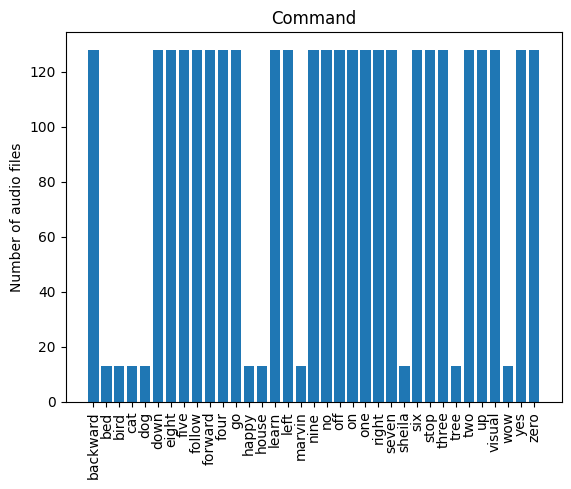

In [ ]:
labels_val_downs, freqs_val_downs = np.unique(val_label_downsampled_cleaned, return_counts=True)
fig, ax = plt.subplots()
ax.bar(labels_val_downs, freqs_val_downs, label=labels_val_downs)
ax.set_ylabel('Number of audio files')
ax.set_title('Command')
plt.xticks(rotation=90)
plt.show()

Conjunto de test

In [ ]:
path_save_downsampled = os.path.join(current_path, "speech_commands_data/downsampled_dataset")
x_test = load_object(os.path.join(path_save_downsampled, 'x_test_downsampled.pickle'))
label_test = load_object(os.path.join(path_save_downsampled, 'label_test_downsampled.pickle'))

La palabra con la frecuencia mínima es forward y tienen un total de 155 intancias.


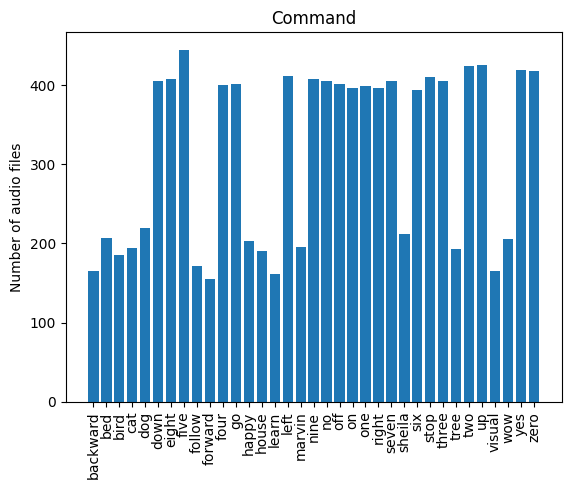

In [ ]:
labels_test, freqs_test = np.unique(label_test, return_counts=True)
ind_min_freq_test = np.argmin(freqs_test)
print('La palabra con la frecuencia mínima es', labels_test[ind_min_freq_test], 'y tienen un total de', freqs_test[ind_min_freq_test], 'intancias.')

fig, ax = plt.subplots()
ax.bar(labels_test, freqs_test, label=labels_test)
ax.set_ylabel('Number of audio files')
ax.set_title('Command')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# De nuevo se realiza downsampling para que todas las clases cuenten con el
# mismo número de instancias en el conjunto de validación
new_size = int(freqs_test[ind_min_freq_test])
print(new_size)
x_test_reduced, label_test_reduced = reduce_number_of_instances(x_test, label_test, new_size)

155


In [ ]:
class_size = len(np.where(np.array(label_test_reduced) == 'bed')[0])

# Ese es el tamaño total que debe tener "Unkown word"
print('Número de comandos que pertenecen a la clase "Unkown word: ', len(commands_unkown_word))

new_size = round(class_size / len(commands_unkown_word))
print(new_size)

Número de comandos que pertenecen a la clase "Unkown word:  10
16


In [ ]:
# Para los comandos que pertenecen a la clase "Unkown class" se reduce el número de instancias
test_data_downsampled_cleaned, test_label_downsampled_cleaned = resize_labels_belonging_to_unkown_class_downsampled_dataset(
    x_test_reduced, label_test_reduced, new_size, commands_unkown_word)

In [ ]:
np.unique(test_label_downsampled_cleaned, return_counts=True)

(array(['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five',
        'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn',
        'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right',
        'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up',
        'visual', 'wow', 'yes', 'zero'], dtype='<U8'),
 array([155,  16,  16,  16,  16, 155, 155, 155, 155, 155, 155, 155,  16,
         16, 155, 155,  16, 155, 155, 155, 155, 155, 155, 155,  16, 155,
        155, 155,  16, 155, 155, 155,  16, 155, 155]))

In [ ]:
print('Data size of the correctly downsampled dataset is', len(test_label_downsampled_cleaned))

Data size of the correctly downsampled dataset is 4035


In [ ]:
save_with_pickle('cleaned_x_test_downsampled.pickle', test_data_downsampled_cleaned, path_save_downsampled)
save_with_pickle('cleaned_label_test_downsampled.pickle', test_label_downsampled_cleaned, path_save_downsampled)

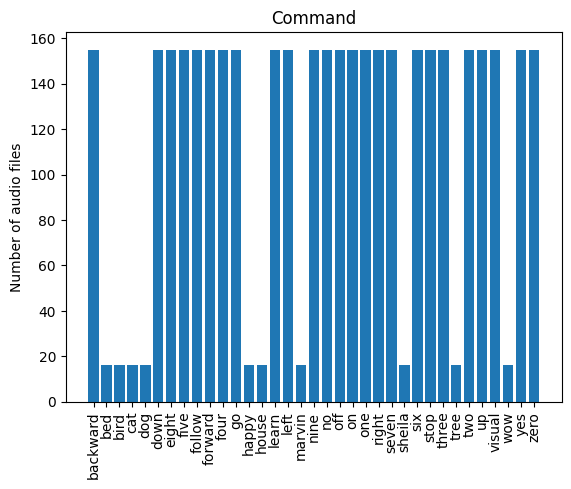

In [ ]:
labels_test_downs, freqs_test_downs = np.unique(test_label_downsampled_cleaned, return_counts=True)
fig, ax = plt.subplots()
ax.bar(labels_test_downs, freqs_test_downs, label=labels_test_downs)
ax.set_ylabel('Number of audio files')
ax.set_title('Command')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pickle
import librosa
import numpy as np

In [ ]:
path_save_downsampled = os.path.join(current_path, "speech_commands_data/downsampled_dataset")

In [ ]:
cleaned_x_train_downsampled = load_object(os.path.join(os.path.join(path_save_downsampled,'cleaned_x_train_downsampled.pickle')))

In [ ]:
cleaned_x_val_downsampled = load_object(os.path.join(os.path.join(path_save_downsampled,'cleaned_x_val_downsampled.pickle')))
cleaned_x_test_downsampled = load_object(os.path.join(os.path.join(path_save_downsampled,'cleaned_x_test_downsampled.pickle')))

In [ ]:
audios_len = np.array([len(audio) for audio in cleaned_x_train_downsampled])
audios_len, audios_len_freq = np.unique(audios_len, return_counts=True)

In [ ]:
audios_len_freq

array([    1,     1,     2,     5,     2,     5,     1,     7,     8,
           1,     1,     1,     6,     2,    15,     1,     1,     1,
           2,    12,     1,    30,     1,    41,     7,    11,     7,
           3,     3,     3,    42,    21,    21,    18,     3,    87,
          24,    18,     1,     1,    52,    52,     1,    23,    36,
          65,    52,    41,    50,     4,     8,    41,   164,     1,
          27,    58,     9,     2,   136,     1,     1,     2,     1,
           3,     1,     2,     1,     1,     1,    39,    59,     2,
           2,    79,   105,     4,     2,     5,   126,     2,    85,
         101,     2,   125,     1,   187,     1,     1,     1,     1,
           1,     3,   108,    67,   120,     2,     1,     6,     1,
           1,     2,   148,    46,   144, 29826])

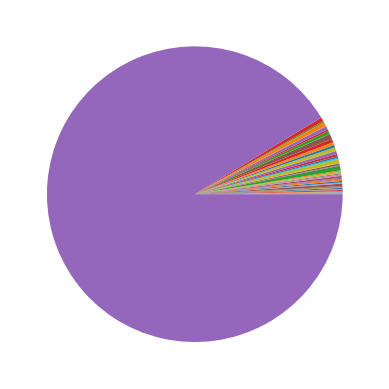

In [ ]:
fig, ax = plt.subplots()
ax.pie(audios_len_freq)
plt.show()

In [ ]:
ind_len_median = np.argmax(audios_len_freq)
len_median = audios_len[ind_len_median]
print('Hay una evidente longitud de audios mayoritaria,', len_median, 'que corresponde con la longitud de', audios_len_freq[ind_len_median], 'audios de un total de', len(cleaned_x_train_downsampled))

Hay una evidente longitud de audios mayoritaria, 16000 que corresponde con la longitud de 29826 audios de un total de 32660


Por lo tanto se va a realizar un padding en los audios que tienen menor longitud. Además, se observa que esta tendencia es similar en los conjuntos de validación y test.

In [ ]:
# Validación
audios_len = np.array([len(audio) for audio in cleaned_x_val_downsampled])
audios_len, audios_len_freq = np.unique(audios_len, return_counts=True)

ind_len_median = np.argmax(audios_len_freq)
len_median = audios_len[ind_len_median]
print('La longitud mayoritaria es', len_median, 'y corresponde con la longitud de', audios_len_freq[ind_len_median], 'audios de un total de', len(cleaned_x_val_downsampled))

La longitud mayoritaria es 16000 y corresponde con la longitud de 2937 audios de un total de 3330


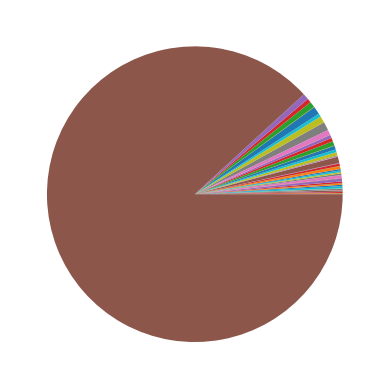

In [ ]:
fig, ax = plt.subplots()
ax.pie(audios_len_freq)
plt.show()

In [ ]:
# Test
audios_len = np.array([len(audio) for audio in cleaned_x_test_downsampled])
audios_len, audios_len_freq = np.unique(audios_len, return_counts=True)

ind_len_median = np.argmax(audios_len_freq)
len_median = audios_len[ind_len_median]
print('Hay una evidente longitud de audios mayoritaria,', len_median, 'que corresponde con la longitud de', audios_len_freq[ind_len_median], 'audios de un total de', len(cleaned_x_test_downsampled))

Hay una evidente longitud de audios mayoritaria, 16000 que corresponde con la longitud de 3705 audios de un total de 4035


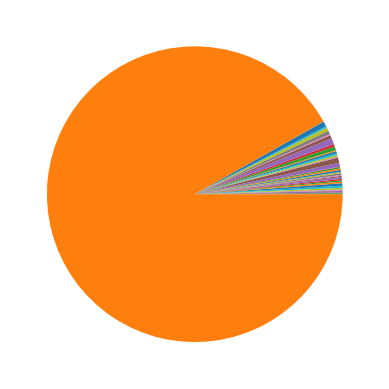

In [ ]:
fig, ax = plt.subplots()
ax.pie(audios_len_freq)
plt.show()

### Padding

In [ ]:
def apply_padding(audio_files, size):
  return [librosa.util.fix_length(audio, size=size) for audio in audio_files]

In [ ]:
size = 16000

In [ ]:
x_train_preprocessed = apply_padding(cleaned_x_train_downsampled, size)
x_val_preprocessed = apply_padding(cleaned_x_val_downsampled, size)
x_test_preprocessed = apply_padding(cleaned_x_test_downsampled, size)

In [ ]:
path_save_downsampled = os.path.join(current_path, "speech_commands_data/downsampled_dataset")

In [ ]:
np.save(os.path.join(path_save_downsampled, 'x_train_preprocessed_downsampled.np'), x_train_preprocessed)
np.save(os.path.join(path_save_downsampled, 'x_val_preprocessed_downsampled.np'), x_val_preprocessed)
np.save(os.path.join(path_save_downsampled, 'x_test_preprocessed_downsampled.np'), x_test_preprocessed)

In [ ]:
path_save_downsampled = os.path.join(current_path, "speech_commands_data/downsampled_dataset")
save_with_pickle('x_train_preprocessed_downsampled.pickle', x_train_preprocessed, path_save_downsampled)
save_with_pickle('x_val_preprocessed_downsampled.pickle', x_val_preprocessed, path_save_downsampled)
save_with_pickle('x_test_preprocessed_downsampled.pickle', x_test_preprocessed, path_save_downsampled)

# Creación del dataset A pequeño (40% del B)

In [ ]:
path_save_small = os.path.join(current_path, 'speech_commands_data/small_dataset')

Train set

In [ ]:
train_label_array = np.array(train_label_downsampled_cleaned)
class_size = len(np.where(train_label_array == 'down')[0])
print('Tamaño de una clase en el conjunto de entrenamiento de la base de datos anterior:', class_size)

Tamaño de una clase en el conjunto de entrenamiento de la base de datos anterior: 1256


In [ ]:
small_class_size = round(class_size * 0.40)
print('Tamaño de una clase en el conjunto de entrenamiento reducido:', small_class_size)

Tamaño de una clase en el conjunto de entrenamiento reducido: 502


In [ ]:
# Se reduce el tamaño del conjunto de los comandos a ese valor
x_train_small_reduced, label_train_small_reduced = reduce_number_of_instances(train_data_downsampled_cleaned, train_label_downsampled_cleaned, small_class_size)

In [ ]:
class_size = len(np.where(np.array(label_train_small_reduced) == 'down')[0])

# Ese es el tamaño total que debe tener "Unkown word"
print('Número de comandos que pertenecen a la clase "Unkown word: ', len(commands_unkown_word))

new_size = round(class_size / len(commands_unkown_word))
print(new_size)

Número de comandos que pertenecen a la clase "Unkown word:  10
50


In [ ]:
# Para los comandos que pertenecen a la clase "Unkown class" se reduce el número de instancias
x_train_small_reduced_cleaned, label_train_small_reduced_cleaned = resize_labels_belonging_to_unkown_class_downsampled_dataset(
    x_train_small_reduced, label_train_small_reduced, new_size, commands_unkown_word)

In [ ]:
np.unique(label_train_small_reduced_cleaned, return_counts=True)

(array(['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five',
        'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn',
        'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right',
        'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up',
        'visual', 'wow', 'yes', 'zero'], dtype='<U8'),
 array([502,  50,  50,  50,  50, 502, 502, 502, 502, 502, 502, 502,  50,
         50, 502, 502,  50, 502, 502, 502, 502, 502, 502, 502,  50, 502,
        502, 502,  50, 502, 502, 502,  50, 502, 502]))

In [ ]:
print('Data size of the small dataset is', len(label_train_small_reduced_cleaned))

Data size of the small dataset is 13050


In [ ]:
save_with_pickle('cleaned_x_train_small.pickle', x_train_small_reduced_cleaned, path_save_small)
save_with_pickle('cleaned_label_train_small.pickle', label_train_small_reduced_cleaned, path_save_small)

Ahora se combinan las instancias de los comandos que pertenecen a la clase "unkown word" en una sola clase

In [ ]:
final_train_data_small, final_train_label_small = get_final_dataset(
    x_train_small_reduced_cleaned, label_train_small_reduced_cleaned
)

In [ ]:
print('Data size of the correctly downsampled dataset is', len(final_train_label_small))

Data size of the correctly downsampled dataset is 13050


In [ ]:
save_with_pickle('final_x_train_small.pickle', final_train_data_small, path_save_small)
save_with_pickle('final_label_train_small.pickle', final_train_label_small, path_save_small)

Validation set

In [ ]:
val_label_array = np.array(val_label_downsampled_cleaned)
class_size = len(np.where(val_label_array == 'down')[0])
print('Tamaño de una clase en el conjunto de validación de la base de datos anterior:', class_size)

Tamaño de una clase en el conjunto de validación de la base de datos anterior: 128


In [ ]:
small_class_size = round(class_size * 0.40)
print('Tamaño de una clase en el conjunto de entrenamiento reducido:', small_class_size)

Tamaño de una clase en el conjunto de entrenamiento reducido: 51


In [ ]:
# Se reduce el tamaño del conjunto de los comandos a ese valor
x_val_small_reduced, label_val_small_reduced = reduce_number_of_instances(val_data_downsampled_cleaned, val_label_downsampled_cleaned, small_class_size)

In [ ]:
class_size = len(np.where(np.array(label_val_small_reduced) == 'down')[0])

# Ese es el tamaño total que debe tener "Unkown word"
print('Número de comandos que pertenecen a la clase "Unkown word: ', len(commands_unkown_word))

new_size = round(class_size / len(commands_unkown_word))
print(new_size)

Número de comandos que pertenecen a la clase "Unkown word:  10
5


In [ ]:
# Para los comandos que pertenecen a la clase "Unkown class" se reduce el número de instancias
x_val_small_reduced_cleaned, label_val_small_reduced_cleaned = resize_labels_belonging_to_unkown_class_downsampled_dataset(
    x_val_small_reduced, label_val_small_reduced, new_size, commands_unkown_word)

In [ ]:
np.unique(label_val_small_reduced_cleaned, return_counts=True)

(array(['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five',
        'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn',
        'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right',
        'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up',
        'visual', 'wow', 'yes', 'zero'], dtype='<U8'),
 array([51,  5,  5,  5,  5, 51, 51, 51, 51, 51, 51, 51,  5,  5, 51, 51,  5,
        51, 51, 51, 51, 51, 51, 51,  5, 51, 51, 51,  5, 51, 51, 51,  5, 51,
        51]))

In [ ]:
print('Data size of the small dataset is', len(label_val_small_reduced_cleaned))


Data size of the small dataset is 1325


In [ ]:
save_with_pickle('cleaned_x_val_small.pickle', x_val_small_reduced_cleaned, path_save_small)
save_with_pickle('cleaned_label_val_small.pickle', label_val_small_reduced_cleaned, path_save_small)

Ahora se combinan las instancias de los comandos que pertenecen a la clase "unkown word" en una sola clase

In [ ]:
final_val_data_small, final_val_label_small = get_final_dataset(
    x_val_small_reduced_cleaned, label_val_small_reduced_cleaned
)

In [ ]:
print('Data size of the correctly downsampled dataset is', len(final_val_label_small))

Data size of the correctly downsampled dataset is 1325


In [ ]:
save_with_pickle('final_x_val_small.pickle', final_val_data_small, path_save_small)
save_with_pickle('final_label_val_small.pickle', final_val_label_small, path_save_small)

Test set

In [ ]:
test_label_array = np.array(test_label_downsampled_cleaned)
class_size = len(np.where(test_label_array == 'down')[0])
print('Tamaño de una clase en el conjunto de test de la base de datos anterior:', class_size)

Tamaño de una clase en el conjunto de test de la base de datos anterior: 155


In [ ]:
small_class_size = round(class_size * 0.40)
print('Tamaño de una clase en el conjunto de test reducido:', small_class_size)

Tamaño de una clase en el conjunto de test reducido: 62


In [ ]:
# Se reduce el tamaño del conjunto de los comandos a ese valor
x_test_small_reduced, label_test_small_reduced = reduce_number_of_instances(test_data_downsampled_cleaned, test_label_downsampled_cleaned, small_class_size)

In [ ]:
class_size = len(np.where(np.array(label_test_small_reduced) == 'down')[0])

# Ese es el tamaño total que debe tener "Unkown word"
print('Número de comandos que pertenecen a la clase "Unkown word: ', len(commands_unkown_word))

new_size = round(class_size / len(commands_unkown_word))
print(new_size)

Número de comandos que pertenecen a la clase "Unkown word:  10
6


In [ ]:
# Para los comandos que pertenecen a la clase "Unkown class" se reduce el número de instancias
x_test_small_reduced_cleaned, label_test_small_reduced_cleaned = resize_labels_belonging_to_unkown_class_downsampled_dataset(
    x_test_small_reduced, label_test_small_reduced, new_size, commands_unkown_word)

In [ ]:
np.unique(label_test_small_reduced_cleaned, return_counts=True)

(array(['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five',
        'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn',
        'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right',
        'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up',
        'visual', 'wow', 'yes', 'zero'], dtype='<U8'),
 array([62,  6,  6,  6,  6, 62, 62, 62, 62, 62, 62, 62,  6,  6, 62, 62,  6,
        62, 62, 62, 62, 62, 62, 62,  6, 62, 62, 62,  6, 62, 62, 62,  6, 62,
        62]))

In [ ]:
print('Data size of the small dataset is', len(label_test_small_reduced_cleaned))

Data size of the small dataset is 1610


In [ ]:
save_with_pickle('cleaned_x_test_small.pickle', x_test_small_reduced_cleaned, path_save_small)
save_with_pickle('cleaned_label_test_small.pickle', label_test_small_reduced_cleaned, path_save_small)

In [ ]:
load_object(path_save_small)

In [ ]:
x_train_small_reduced_cleaned = load_object(os.path.join(path_save_small, 'cleaned_x_train_small.pickle'))
x_val_small_reduced_cleaned = load_object(os.path.join(path_save_small,'cleaned_x_val_small.pickle'))
x_test_small_reduced_cleaned = load_object(os.path.join(path_save_small,'cleaned_x_test_small.pickle'))

### Padding

In [ ]:
size = 16000
x_train_preprocessed_small = apply_padding(x_train_small_reduced_cleaned, size)
x_val_preprocessed_small = apply_padding(x_val_small_reduced_cleaned, size)
x_test_preprocessed_small = apply_padding(x_test_small_reduced_cleaned, size)

In [ ]:
path_save_small = os.path.join(current_path, 'speech_commands_data/small_dataset')

In [ ]:
np.save(os.path.join(path_save_small, 'x_train_preprocessed_small.np'), x_train_preprocessed_small)
np.save(os.path.join(path_save_small, 'x_val_preprocessed_small.np'), x_val_preprocessed_small)
np.save(os.path.join(path_save_small, 'x_test_preprocessed_small.np'), x_test_preprocessed_small)

In [ ]:
# path_save_downsampled = os.path.join(current_path, "speech_commands_data/downsampled_dataset")
save_with_pickle('x_train_preprocessed_small.pickle', x_train_preprocessed_small, path_save_small)
save_with_pickle('x_val_preprocessed_small.pickle', x_val_preprocessed_small, path_save_small)
save_with_pickle('x_test_preprocessed_small.pickle', x_test_preprocessed_small, path_save_small)

# Creación dataset B.1 (añadir 30% de muestras con ruido a B)

In [ ]:
import numpy as np
import pickle
import librosa

In [ ]:
path_save_downsampled = os.path.join(current_path, "speech_commands_data/downsampled_dataset/")
x_train = np.load(os.path.join(path_save_downsampled, 'x_train_preprocessed_downsampled.np.npy'))

In [ ]:
label_train = np.array(load_object(os.path.join(path_save_downsampled, 'cleaned_label_train_downsampled.pickle')))

In [ ]:
sr = 16000
path_to_noise = os.path.join(dataset_path, '_background_noise_')
noise_1s, sample_rate = librosa.load(os.path.join(path_to_noise, 'doing_the_dishes.wav') ,sr=sr, duration=1)

# The noise level lets the user choose the amount of noise added to the original file
def data_augmentation_add_noise(data, noise_level):
  return data + noise_1s * noise_level


Train set

In [ ]:
# Se calcula el 30% del tamaño de las clases
class_size = len(np.where(label_train == 'down')[0])
print('Tamaño de una clase en el conjunto de entrenamiento de la base de datos B es:', class_size)
class_size_03 = round(class_size * 0.3)
print('El número de instancias añadidas con data augmentation a cada clase, que corresponde al 30% de los datos, es:', class_size_03)

Tamaño de una clase en el conjunto de entrenamiento de la base de datos B es: 1256
El número de instancias añadidas con data augmentation a cada clase, que corresponde al 30% de los datos, es: 377


In [ ]:
x_train_03, label_train_03 = reduce_number_of_instances(x_train, label_train, class_size_03)

In [ ]:
# Ese es el tamaño total que debe tener "Unkown word"
print('Número de comandos que pertenecen a la clase "Unkown word: ', len(commands_unkown_word))

new_size_03 = round(class_size_03 / len(commands_unkown_word))
print(new_size_03)

Número de comandos que pertenecen a la clase "Unkown word:  10
38


In [ ]:
new_x_train_03, new_label_train_03 = resize_labels_belonging_to_unkown_class_downsampled_dataset(
    x_train_03, label_train_03, new_size_03, commands_unkown_word)

In [ ]:
x_train_augmented = np.vstack((x_train, np.array(new_x_train_03)))
label_train_augmented = np.append(label_train, np.array(new_label_train_03))

In [ ]:
print('La nueva base de datos tiene', len(label_train_augmented), 'instancias')
_, freq = np.unique(label_train_augmented == 'backward', return_counts=True)
print('El número de instancias en cada clase es de', freq[-1])

La nueva base de datos tiene 42465 instancias
El número de instancias en cada clase es de 1633


In [ ]:
np.unique(label_train_augmented, return_counts=True)

(array(['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five',
        'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn',
        'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right',
        'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up',
        'visual', 'wow', 'yes', 'zero'], dtype='<U8'),
 array([1633,  164,  164,  164,  164, 1633, 1633, 1633, 1633, 1633, 1633,
        1633,  164,  164, 1633, 1633,  164, 1633, 1633, 1633, 1633, 1633,
        1633, 1633,  164, 1633, 1633, 1633,  164, 1633, 1633, 1633,  164,
        1633, 1633]))

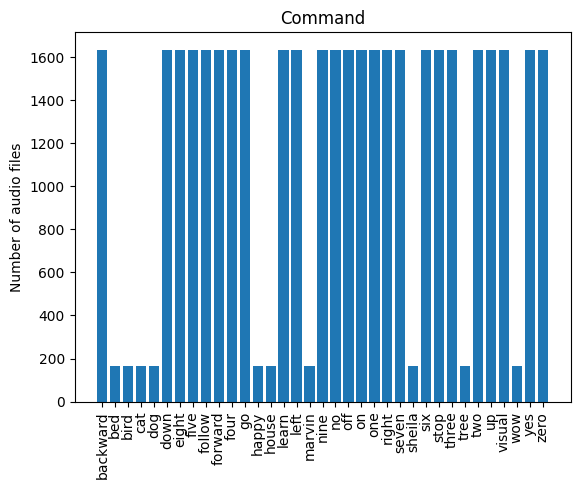

In [ ]:
labels, freqs = np.unique(label_train_augmented, return_counts=True)
fig, ax = plt.subplots()
ax.bar(labels, freqs, label=labels)
ax.set_ylabel('Number of audio files')
ax.set_title('Command')
plt.xticks(rotation=90)
plt.show()

In [ ]:
np.save(os.path.join(path_save_downsampled, 'x_train_augmented'), x_train_augmented)
np.save(os.path.join(path_save_downsampled, 'label_train_augmented'), label_train_augmented)